In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

df = pd.read_csv('games.csv')
print(df.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0 

In [3]:
print(df.describe())

             app_id  positive_ratio  user_reviews   price_final  \
count  5.079600e+04    50796.000000  5.079600e+04  50796.000000   
mean   1.053900e+06       77.051205  1.826493e+03      8.600661   
std    6.094493e+05       18.255492  4.010343e+04     11.496417   
min    1.000000e+01        0.000000  1.000000e+01      0.000000   
25%    5.282450e+05       67.000000  1.900000e+01      0.990000   
50%    9.850750e+05       81.000000  4.800000e+01      4.990000   
75%    1.523155e+06       91.000000  2.060000e+02     10.990000   
max    2.576800e+06      100.000000  7.494460e+06    299.990000   

       price_original      discount  
count    50796.000000  50796.000000  
mean         8.739845      5.600579  
std         11.510670     18.619336  
min          0.000000      0.000000  
25%          0.990000      0.000000  
50%          4.990000      0.000000  
75%         11.990000      0.000000  
max        299.990000     90.000000  


In [4]:
print(df['rating'].value_counts())

Positive                   13492
Very Positive              13107
Mixed                      12135
Mostly Positive             8727
Mostly Negative             1848
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: rating, dtype: int64


In [5]:
# Step 3: Preprocessing Data
df['win'] = df['win'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)

rating_encoder = OneHotEncoder(sparse=False)
rating_encoded = rating_encoder.fit_transform(df[['rating']])

df_rating_encoded = pd.DataFrame(rating_encoded, columns=rating_encoder.categories_)
df = pd.concat([df.drop('rating', axis=1), df_rating_encoded], axis=1)

# Normalize the numerical features
scaler = StandardScaler()
df[['positive_ratio', 'user_reviews', 'price_final']] = scaler.fit_transform(df[['positive_ratio', 'user_reviews', 'price_final']])

In [6]:
# Step 4: Clustering (Unsupervised Learning) - Optional
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['positive_ratio', 'user_reviews', 'price_final']])

# Check the distribution of games across the clusters
print(df['cluster'].value_counts())

4    27533
0    12869
2     9003
1     1390
3        1
Name: cluster, dtype: int64


In [7]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


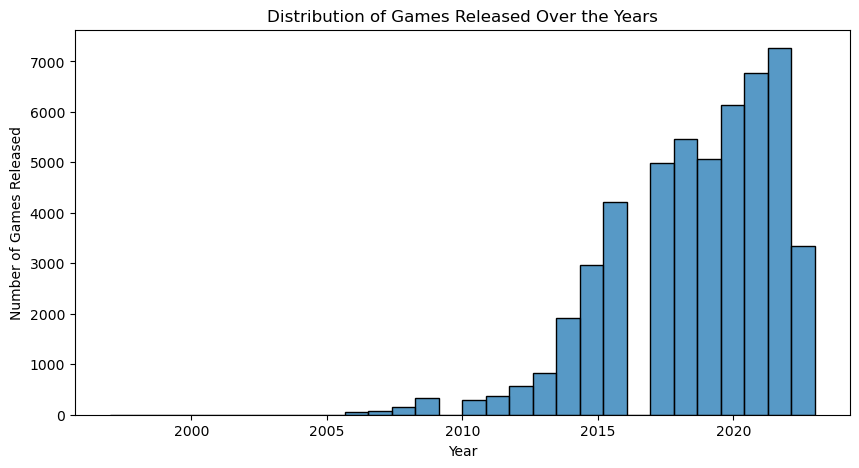

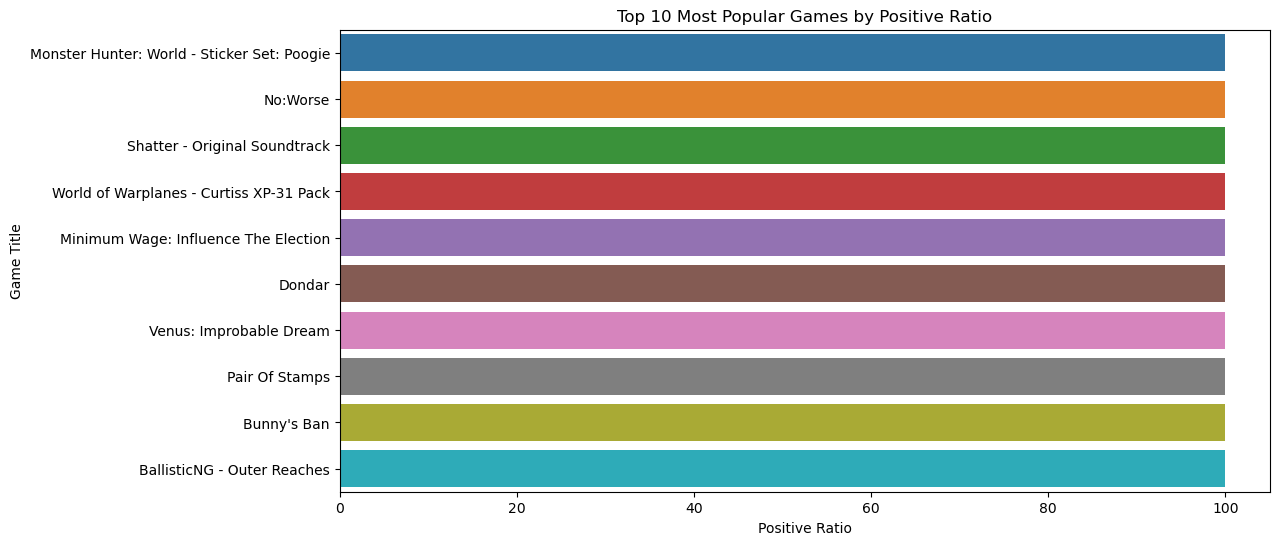

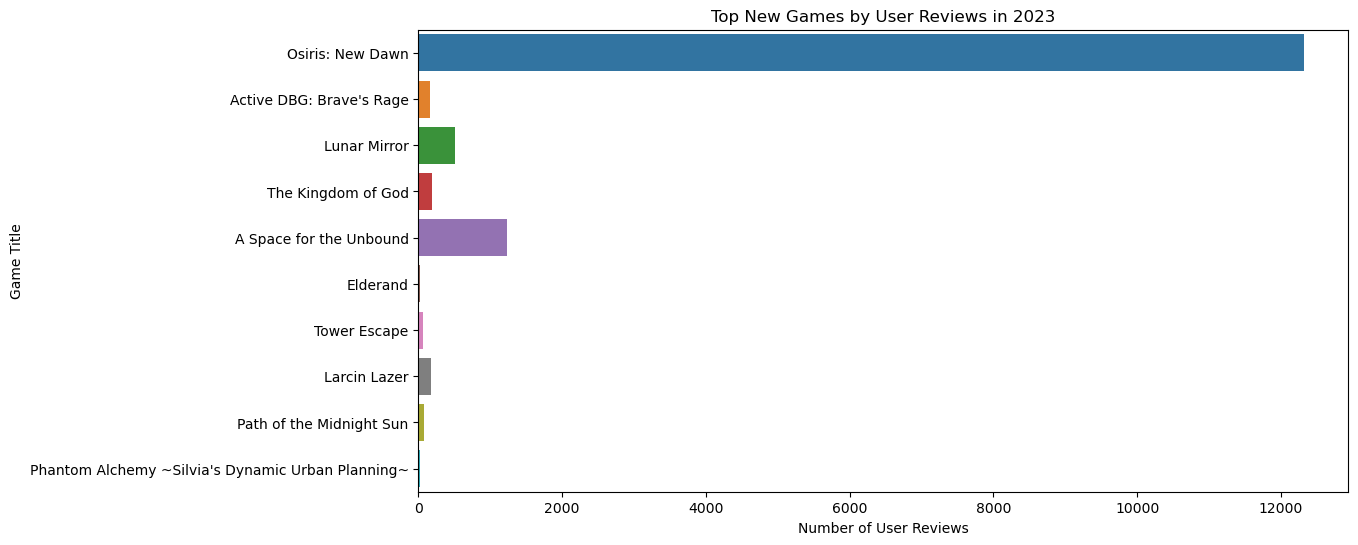

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the correct matplotlib backend set up for your environment if you are not using Jupyter Notebooks.
%matplotlib inline

# Load the data
df = pd.read_csv('games.csv')

# Convert 'date_release' to datetime and extract the year
df['date_release'] = pd.to_datetime(df['date_release'], errors='coerce')
df['release_year'] = df['date_release'].dt.year

# Plot a histogram of the games released by year (Past Games)
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'].dropna(), bins=30, kde=False)
plt.title('Distribution of Games Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.show()

# Plot the Most Popular Games by Positive Ratio (assuming 'positive_ratio' is out of 100)
top_games = df.sort_values('positive_ratio', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='positive_ratio', y='title', data=top_games)
plt.title('Top 10 Most Popular Games by Positive Ratio')
plt.xlabel('Positive Ratio')
plt.ylabel('Game Title')
plt.show()

# Plot New Games released in the last year in the dataset (New Games)
current_year = df['release_year'].max()
new_games = df[df['release_year'] == current_year]

plt.figure(figsize=(12, 6))
sns.barplot(x='user_reviews', y='title', data=new_games.head(10))
plt.title(f'Top New Games by User Reviews in {current_year}')
plt.xlabel('Number of User Reviews')
plt.ylabel('Game Title')
plt.show()


In [11]:
from IPython.display import Image 
Image(url="Screenshot 2023-11-09 at 12.43.15 PM.png", width=1000, height=1500)

In [12]:
Image(url="Screenshot 2023-11-09 at 12.43.07 PM.png", width=700, height=700)

In [15]:
Image(url="Screenshot 2023-11-09 at 12.43.20 PM.png", width=1000, height=1000)